<a href="https://colab.research.google.com/github/jsacco1/elispot_assay_performance/blob/master/tmp_tnt_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load modules

In [0]:
# load modules
import numpy as np 
import pandas as pd
import csv

from collections import Counter
from numpy import where


import seaborn as sns

import sklearn as sk
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import statsmodels.api as sm
from statsmodels.imputation import mice

from scipy import stats

from datetime import datetime, date, time, timedelta

import warnings
warnings.filterwarnings('ignore')

In [0]:
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [0]:
# set vars
cellType = 'Bulk PBMC'
stim = 'a-CD3' # Stimulus.in.Readout

In [0]:
# mnf1 = pd.read_csv(AAA, parse_dates=['MNFD','MNF01', 'MNFTM'], infer_datetime_format=['MNFTM'])
# mnf2 = pd.read_csv(BBB, parse_dates=['MNFD','MNF01', 'MNFTM'], infer_datetime_format=['MNFTM'])
# cd3 =  pd.read_csv(igs, index_col=False, infer_datetime_format=['Sample.Date'])


mnf1 = pd.read_csv('/content/sample_data/MNF1.csv', parse_dates=['MNFD','MNF01', 'MNFTM'], infer_datetime_format=['MNFTM'])

In [0]:
mnf2 = pd.read_csv('/content/sample_data/MNF2.csv', parse_dates=['MNFD','MNF01', 'MNFTM'], infer_datetime_format=['MNFTM'])

In [0]:
cd3 = pd.read_csv('/content/sample_data/IGS1_.csv', index_col=False, infer_datetime_format=['Sample.Date'])

In [0]:
# left join mnfs on igs1

In [129]:
# inspect cols of mnf1, mnf2

print('mnf1 cols: \n', mnf1.columns)

print('mnf2 cols: \n',mnf2.columns)

mnf1 cols: 
 Index(['ACCSNM', 'STUDYID', 'PATNUM', 'MNFD', 'MNFTM', 'VISIT', 'MNFTPT',
       'MNFFV', 'MNFPVC', 'MNFALID', 'MNFCNTRY', 'MNFSITE', 'MNFINV',
       'MNFSCRN', 'MNFSPRDT', 'MNFBIOM', 'MNFTUBEN', 'MNFSSTAT', 'MNFSCOND',
       'MNFSCOM', 'MNFSHPST', 'MNFSHPDT', 'MNFRLAB', 'MNFTRKNM', 'MNFPNM',
       'MNF01', 'MNF02', 'MNF03', 'MNF04', 'MNF05', 'MNF06', 'MNF07', 'MNF08',
       'MNFSPBID', 'MNFREFID', 'MNF11', 'MNF12', 'MNF13', 'MNF14', 'MNF15',
       'MNF16', 'MNF17', 'MNF18', 'MNF19', 'SOURCE_FILE_DATETIME'],
      dtype='object')
mnf2 cols: 
 Index(['PATNUM', 'MNFD', 'MNFTM', 'VISIT', 'MNFTPT', 'MNFALID', 'MNFCNTRY',
       'MNFSITE', 'MNFSPRDT', 'MNFBIOM', 'MNFTUBEN', 'MNFSSTAT', 'MNFSCOND',
       'MNFSCOM', 'MNFSHPST', 'MNFSHPDT', 'MNF01', 'MNF02', 'MNF03', 'MNF04',
       'MNF05', 'MNF06', 'MNF07', 'MNF08', 'MNFSPBID', 'MNFREFID', 'MNF12',
       'MNF13', 'MNF14', 'MNF15', 'MNF16', 'MNF17', 'MNF18', 'MNF19'],
      dtype='object')


In [130]:
mnf1.shape, mnf2.shape

((6260, 45), (1456, 34))

In [131]:
cd3.columns

Index(['Group', 'Patient.ID', 'MES.Work.Order.ID', 'Study.ID',
       'Analytical.Study.ID', 'Sample.ID', 'Sample.Date', 'Visit',
       'Type.of.Cells', 'Type.of.Stimulus.in.IVS', 'Stimulus.in.IVS',
       'Stimulus.Format.in.IVS', 'Type.of.Stimulus.in.Readout',
       'Stimulus.in.Readout', 'Target', 'Unique.Target.ID',
       'Stimulus.Format.in.Readout', 'Number.of.Cells', 'Valid.DFR.eq.',
       'Valid.DFR.2x.', 'EXR.Valid.DFR.eq.', 'EXR.Valid.DFR.2x.',
       'Positive.Mean.Spot.Count.Filter', 'Negative.Mean.Spot.Count.Filter',
       'NGT.01.IRV.Filter', 'ASC.Valid.DFR.eq.', 'ASC.Valid.DFR.2x.',
       'Mean.Spot.Count', 'Mean.Spot.Count.Filter', 'IRV', 'IRV.Filter',
       'Negative.Groups', 'NGT.01.DFR.eq..p.value',
       'NGT.01.DFR.eq..p.value.Filter', 'NGT.01.DFR.2x..p.value',
       'NGT.01.DFR.2x..p.value.Filter', 'Position.01', 'Position.02',
       'Position.03', 'Position.04', 'Plate.Number.01', 'Plate.Number.02',
       'Plate.Number.03', 'Plate.Number.04', 'Count.01

In [0]:
# check that only one col has your stimulus
assert(len(cd3.columns[cd3.isin(['a-CD3']).sum() > 0]) == 1)

In [0]:
# rename some cols
cd3.rename(columns = {'Patient.ID': 'PATNUM', 'Visit': 'VISIT', 'Mean.Spot.Count': 'counts'}, inplace =True)


In [134]:
cd3[0:3]

,Group,PATNUM,MES.Work.Order.ID,Study.ID,Analytical.Study.ID,Sample.ID,Sample.Date,VISIT,Type.of.Cells,Type.of.Stimulus.in.IVS,Stimulus.in.IVS,Stimulus.Format.in.IVS,Type.of.Stimulus.in.Readout,Stimulus.in.Readout,Target,Unique.Target.ID,Stimulus.Format.in.Readout,Number.of.Cells,Valid.DFR.eq.,Valid.DFR.2x.,EXR.Valid.DFR.eq.,EXR.Valid.DFR.2x.,Positive.Mean.Spot.Count.Filter,Negative.Mean.Spot.Count.Filter,NGT.01.IRV.Filter,ASC.Valid.DFR.eq.,ASC.Valid.DFR.2x.,counts,Mean.Spot.Count.Filter,IRV,IRV.Filter,Negative.Groups,NGT.01.DFR.eq..p.value,NGT.01.DFR.eq..p.value.Filter,NGT.01.DFR.2x..p.value,NGT.01.DFR.2x..p.value.Filter,Position.01,Position.02,Position.03,Position.04,Plate.Number.01,Plate.Number.02,Plate.Number.03,Plate.Number.04,Count.01,Count.02,Count.03,Count.04,Exp.was.analyzed.with.original.Negative.Group,Original.Negative.Group,Associated.Groups,Positive.Groups,Comparison.Groups,Families.for.Negative.Groups,Families.for.Comparison.Groups,Subfamily.Group.Pair.Size.for.Negative.Groups,Subfamily.Group.Pair.Size.for.Comparison.Groups,NGT.01.DFR.eq..statistic,NGT.01.DFR.2x..statistic,Plate.Barcode.01,Plate.Barcode.02,Plate.Barcode.03,Plate.Barcode.04,Filename.01,Filename.02,Filename.03,Filename.04
0,1,44212,NaN,GO39733,GA-RB-017-01A,6208477593,11FEB2019,DM28,Bulk PBMC,NaN,NaN,NaN,peptides,Peptides A1,79,GO39733_A44212_SAKRKSKKNIRKQQMKILFNVVLEARE,pooled peptides,NaN,NT,0,NT,0,PASS,PASS,PASS,-1,-1,0.0,FAIL,0.000000,PASS,3,NT,NT,1.0,FAIL,B01,B02,NaN,NaN,1,1.0,NaN,NaN,0,0,NaN,NaN,True,-1,0,25,0,3,0,2,4,0.0,NT,-1.1489401715370782,A44212Pl1_291019_10-13-00-count_QC,A44212Pl1_291019_10-13-00-count_QC,NaN,NaN,NaN,NaN,NaN
1,2,44212,NaN,GO39733,GA-RB-017-01A,6209278307,04JUL2019,EOTBII,Bulk PBMC,NaN,NaN,NaN,peptides,Peptides A1,79,GO39733_A44212_SAKRKSKKNIRKQQMKILFNVVLEARE,pooled peptides,NaN,NT,0,NT,0,PASS,PASS,PASS,-1,-1,0.0,FAIL,0.000000,PASS,4,NT,NT,1.0,FAIL,B03,B04,NaN,NaN,1,1.0,NaN,NaN,0,0,NaN,NaN,True,-1,0,26,0,4,0,2,4,0.0,NT,-0.9568423182634564,A44212Pl1_291019_10-13-00-count_QC,A44212Pl1_291019_10-13-00-count_QC,NaN,NaN,NaN,NaN,NaN
2,5,44212,NaN,GO39733,GA-RB-017-01A,6208477593,11FEB2019,DM28,Bulk PBMC,NaN,NaN,NaN,peptides,Peptides A2,59,GO39733_A44212_ELLMNGTSSTAEALGLKGSSPTPPCSP,pooled peptides,NaN,NT,0,NT,0,PASS,PASS,PASS,-1,-1,8.5,FAIL,0.052632,PASS,3,NT,NT,1.0,FAIL,B09,B10,NaN,NaN,1,1.0,NaN,NaN,8,9,NaN,NaN,True,-1,0,25,0,3,0,2,4,0.0,NT,-0.14745638372773767,A44212Pl1_291019_10-13-00-count_QC,A44212Pl1_291019_10-13-00-count_QC,NaN,NaN,NaN,NaN,NaN


In [0]:
# filter for 'type of cell' column
typecell_col = ''.join([col for col in [col for col in cd3.columns if "Cells" in col] if "Type" in col])  #change index if different

In [136]:
print(typecell_col)

Type.of.Cells


In [137]:
cd3[typecell_col].value_counts()

Bulk PBMC    1250
CD8           878
CD4           878
Name: Type.of.Cells, dtype: int64

In [138]:
# find and filter stimulus column. chained conditions
stim_col = ''.join(cd3.columns[cd3.isin(['a-CD3']).sum() > 0])
print(stim_col)

Stimulus.in.Readout


In [139]:
# shape filtered on a-CD3
cd3[cd3[stim_col] == stim].shape 


(259, 67)

In [140]:
# shape filtered on desired type of cell (Bulk PBMC)
cd3[cd3[typecell_col] == cellType].shape 

(1250, 67)

In [0]:
# isolate Bulk PBMC
cd3 = cd3[cd3[typecell_col] == cellType]

In [0]:
# isolate a-CD3 stimulus from bulk PBMC
cd3 = cd3[cd3[stim_col] == stim]

In [143]:
# check that a-CD3 is only stimulus left
cd3['Stimulus.in.Readout'].value_counts()

a-CD3    105
Name: Stimulus.in.Readout, dtype: int64

In [144]:
# check bulk PBMC isolated
cd3[typecell_col].value_counts()

Bulk PBMC    105
Name: Type.of.Cells, dtype: int64

In [145]:
# drop all from cd3 except stimulus.in.readout, patnum, visit, and sample.id, type of cells, and mean spot count ('counts')
cd_keepers = ['PATNUM', 'VISIT', 'Sample.ID', 'Sample.Date', typecell_col, stim_col, 'counts']
print(cd_keepers)

cd3 = cd3[cd_keepers]

['PATNUM', 'VISIT', 'Sample.ID', 'Sample.Date', 'Type.of.Cells', 'Stimulus.in.Readout', 'counts']


In [146]:
print(cd3[0:3],"\n" , "CD3 dataframe, filtered on stimulus and cell type: \n", cd3.shape, " \n", "null values by col: \n", cd3.isnull().sum())

    PATNUM   VISIT   Sample.ID  ... Type.of.Cells Stimulus.in.Readout  counts
40   44212    DM28  6208477593  ...     Bulk PBMC               a-CD3  1200.0
41   44212  EOTBII  6209278307  ...     Bulk PBMC               a-CD3  1200.0
42   44212    DM28  6208477593  ...     Bulk PBMC               a-CD3  1200.0

[3 rows x 7 columns] 
 CD3 dataframe, filtered on stimulus and cell type: 
 (105, 7)  
 null values by col: 
 PATNUM                 0
VISIT                  0
Sample.ID              0
Sample.Date            0
Type.of.Cells          0
Stimulus.in.Readout    0
counts                 0
dtype: int64


In [147]:
len(cd3.PATNUM.unique())

34

# Merge MNF1 and MNF2 on common columns

In [0]:
mnf_keepers = ['PATNUM', 'MNFD', 'MNFTM', 'VISIT', 'MNFTPT', 'MNFALID', 'MNFCNTRY',
       'MNFSITE', 'MNFSPRDT', 'MNFBIOM', 'MNFTUBEN', 'MNF01', 'MNFREFID', 'MNF06', 'MNF14', 'MNF15', 'MNF16', 'MNF17']

In [0]:
# drop cols
mnf1_dropped = mnf1[mnf_keepers]
mnf2_dropped = mnf2[mnf_keepers]

In [0]:
merged = mnf1_dropped.append(mnf2_dropped, ignore_index=True)

In [151]:
merged.shape

(7716, 18)

In [152]:
# check for dup indices
merged.index[merged.index.duplicated()].unique()
len(merged[merged.index.duplicated()])

0

# Derive Turn-Around Time for Sample Manifests

In [0]:
# make a collection time column 
# create collection column and reformat
merged['MNFTM']  = merged.MNFTM.dt.time

merged['MNFTM'] = pd.to_timedelta(merged['MNFTM'].astype(str))

merged["Collection"] = pd.to_datetime(merged.pop('MNFD')) + pd.to_timedelta(merged.pop('MNFTM').astype(str))


In [154]:
merged.columns

Index(['PATNUM', 'VISIT', 'MNFTPT', 'MNFALID', 'MNFCNTRY', 'MNFSITE',
       'MNFSPRDT', 'MNFBIOM', 'MNFTUBEN', 'MNF01', 'MNFREFID', 'MNF06',
       'MNF14', 'MNF15', 'MNF16', 'MNF17', 'Collection'],
      dtype='object')

In [0]:
# create TAT column
merged["TAT"] = merged["MNF01"] - merged["Collection"]
merged['TAT'] = merged['TAT']/np.timedelta64(1,'h')

In [0]:
# filter MNFBIOM
merged = merged[merged['MNFBIOM']== 'PBMC']

In [157]:
merged.head()

,PATNUM,VISIT,MNFTPT,MNFALID,MNFCNTRY,MNFSITE,MNFSPRDT,MNFBIOM,MNFTUBEN,MNF01,MNFREFID,MNF06,MNF14,MNF15,MNF16,MNF17,Collection,TAT
1,12342,DM28,NaN,1.0,USA,304657,20180102 18:50,PBMC,PBMC-I,2018-01-02 19:05:00,6505898300,94.9,NaN,NaN,NaN,NaN,2018-01-02 08:06:00,10.983333
2,12342,DM28,NaN,2.0,USA,304657,20180102 18:50,PBMC,PBMC-I,2018-01-02 19:05:00,6505898300,94.9,NaN,NaN,NaN,NaN,2018-01-02 08:06:00,10.983333
3,12342,DM28,NaN,3.0,USA,304657,20180102 18:50,PBMC,PBMC-I,2018-01-02 19:05:00,6505898300,94.9,NaN,NaN,NaN,NaN,2018-01-02 08:06:00,10.983333
4,12342,DM28,NaN,4.0,USA,304657,20180102 18:50,PBMC,PBMC-I,2018-01-02 19:05:00,6505898300,94.9,NaN,NaN,NaN,NaN,2018-01-02 08:06:00,10.983333
6,12716,DM28,NaN,1.0,USA,304657,20180110 17:32,PBMC,PBMC-I,2018-01-10 17:43:00,6505898301,95.2,NaN,NaN,NaN,NaN,2018-01-10 10:20:00,7.383333


In [158]:
merged.shape

(6558, 18)

# Merge Manifest Dataframe with CD3 (assay performance dataframe)

In [159]:
merged['PATNUM'].isin(cd3['PATNUM']).value_counts()

False    5172
True     1386
Name: PATNUM, dtype: int64

In [160]:
merged['VISIT'].isin(cd3['VISIT']).value_counts()

True     5346
False    1212
Name: VISIT, dtype: int64

In [161]:
print(pd.merge(cd3, merged, how = 'left', on=['PATNUM', 'VISIT']).shape)

(404, 23)


In [162]:
print(pd.merge(cd3, merged, how = 'left', on=['PATNUM', 'VISIT']).isnull().mean() * 100)

PATNUM                   0.000000
VISIT                    0.000000
Sample.ID                0.000000
Sample.Date              0.000000
Type.of.Cells            0.000000
Stimulus.in.Readout      0.000000
counts                   0.000000
MNFTPT                 100.000000
MNFALID                 13.366337
MNFCNTRY                13.366337
MNFSITE                 13.366337
MNFSPRDT                19.801980
MNFBIOM                 13.366337
MNFTUBEN                13.366337
MNF01                   13.366337
MNFREFID                13.366337
MNF06                   13.366337
MNF14                   49.504950
MNF15                   49.504950
MNF16                   92.079208
MNF17                   66.336634
Collection              13.366337
TAT                     13.366337
dtype: float64


In [0]:
# create merged df with cd3 and manifests
df = pd.merge(cd3, merged, how = 'left', on=['PATNUM', 'VISIT'])

In [164]:
df.loc[df['counts'].idxmax()]

PATNUM                               44212
VISIT                                 DM28
Sample.ID                       6208477593
Sample.Date                      11FEB2019
Type.of.Cells                    Bulk PBMC
Stimulus.in.Readout                  a-CD3
counts                                1200
MNFTPT                                 NaN
MNFALID                                  1
MNFCNTRY                            Sweden
MNFSITE                             306876
MNFSPRDT                    20190211 10:39
MNFBIOM                               PBMC
MNFTUBEN                            PBMC-I
MNF01                  2019-02-11 11:30:00
MNFREFID                        6208477593
MNF06                                 99.5
MNF14                                 21.5
MNF15                                 24.1
MNF16                                  NaN
MNF17                                 22.9
Collection             2019-02-11 09:20:00
TAT                                2.16667
Name: 0, dt

In [165]:
len(df.PATNUM.unique())

34

In [166]:
df.columns, df.shape

(Index(['PATNUM', 'VISIT', 'Sample.ID', 'Sample.Date', 'Type.of.Cells',
        'Stimulus.in.Readout', 'counts', 'MNFTPT', 'MNFALID', 'MNFCNTRY',
        'MNFSITE', 'MNFSPRDT', 'MNFBIOM', 'MNFTUBEN', 'MNF01', 'MNFREFID',
        'MNF06', 'MNF14', 'MNF15', 'MNF16', 'MNF17', 'Collection', 'TAT'],
       dtype='object'), (404, 23))

In [167]:
df.isnull().sum()

PATNUM                   0
VISIT                    0
Sample.ID                0
Sample.Date              0
Type.of.Cells            0
Stimulus.in.Readout      0
counts                   0
MNFTPT                 404
MNFALID                 54
MNFCNTRY                54
MNFSITE                 54
MNFSPRDT                80
MNFBIOM                 54
MNFTUBEN                54
MNF01                   54
MNFREFID                54
MNF06                   54
MNF14                  200
MNF15                  200
MNF16                  372
MNF17                  268
Collection              54
TAT                     54
dtype: int64

# Binarize Mean Spot Counts into above/below 500

In [0]:
df['binned'] = np.digitize(df.counts,[500])

In [169]:
df.dtypes

PATNUM                          int64
VISIT                          object
Sample.ID                      object
Sample.Date                    object
Type.of.Cells                  object
Stimulus.in.Readout            object
counts                        float64
MNFTPT                        float64
MNFALID                       float64
MNFCNTRY                       object
MNFSITE                       float64
MNFSPRDT                       object
MNFBIOM                        object
MNFTUBEN                       object
MNF01                  datetime64[ns]
MNFREFID                       object
MNF06                         float64
MNF14                         float64
MNF15                         float64
MNF16                         float64
MNF17                         float64
Collection             datetime64[ns]
TAT                           float64
binned                          int64
dtype: object

In [170]:
# check degree of class imbalance
df.binned.value_counts()

1    381
0     23
Name: binned, dtype: int64

In [0]:
# df[['binned']] = df[['binned']].fillna(value=1)

In [172]:
len(df[df["binned"].isnull()])

0

In [0]:
df_0 = pd.get_dummies(df, columns=["VISIT"], prefix=['visit_'])

In [174]:
df_0.dtypes

PATNUM                          int64
Sample.ID                      object
Sample.Date                    object
Type.of.Cells                  object
Stimulus.in.Readout            object
counts                        float64
MNFTPT                        float64
MNFALID                       float64
MNFCNTRY                       object
MNFSITE                       float64
MNFSPRDT                       object
MNFBIOM                        object
MNFTUBEN                       object
MNF01                  datetime64[ns]
MNFREFID                       object
MNF06                         float64
MNF14                         float64
MNF15                         float64
MNF16                         float64
MNF17                         float64
Collection             datetime64[ns]
TAT                           float64
binned                          int64
visit__C2D1                     uint8
visit__C2d1                     uint8
visit__C4D1                     uint8
visit__C4d1 

In [175]:
df_0.isnull().sum()

PATNUM                   0
Sample.ID                0
Sample.Date              0
Type.of.Cells            0
Stimulus.in.Readout      0
counts                   0
MNFTPT                 404
MNFALID                 54
MNFCNTRY                54
MNFSITE                 54
MNFSPRDT                80
MNFBIOM                 54
MNFTUBEN                54
MNF01                   54
MNFREFID                54
MNF06                   54
MNF14                  200
MNF15                  200
MNF16                  372
MNF17                  268
Collection              54
TAT                     54
binned                   0
visit__C2D1              0
visit__C2d1              0
visit__C4D1              0
visit__C4d1              0
visit__C5d1              0
visit__C6D1              0
visit__C6d1              0
visit__C8D1              0
visit__DM14              0
visit__DM28              0
visit__DM28_DM14         0
visit__EOTA              0
visit__EOTB              0
visit__EOTBII            0
v

# Create numeric dataframe with the binned y category

In [0]:
df_num = df_0.select_dtypes(include=[np.number])

In [177]:
df_num.dtypes

PATNUM                int64
counts              float64
MNFTPT              float64
MNFALID             float64
MNFSITE             float64
MNF06               float64
MNF14               float64
MNF15               float64
MNF16               float64
MNF17               float64
TAT                 float64
binned                int64
visit__C2D1           uint8
visit__C2d1           uint8
visit__C4D1           uint8
visit__C4d1           uint8
visit__C5d1           uint8
visit__C6D1           uint8
visit__C6d1           uint8
visit__C8D1           uint8
visit__DM14           uint8
visit__DM28           uint8
visit__DM28_DM14      uint8
visit__EOTA           uint8
visit__EOTB           uint8
visit__EOTBII         uint8
visit__XOVER          uint8
dtype: object

In [178]:
df_num.shape

(404, 27)

In [179]:

visit_cols = [col for col in df_num if 'visit' in col]
print(visit_cols)

['visit__C2D1', 'visit__C2d1', 'visit__C4D1', 'visit__C4d1', 'visit__C5d1', 'visit__C6D1', 'visit__C6d1', 'visit__C8D1', 'visit__DM14', 'visit__DM28', 'visit__DM28_DM14', 'visit__EOTA', 'visit__EOTB', 'visit__EOTBII', 'visit__XOVER']


In [180]:
print(['PATNUM', 'MNF14', 'MNF15', 'MNF17', 'TAT', 'binned'] + [col for col in df_num if col in visit_cols])

['PATNUM', 'MNF14', 'MNF15', 'MNF17', 'TAT', 'binned', 'visit__C2D1', 'visit__C2d1', 'visit__C4D1', 'visit__C4d1', 'visit__C5d1', 'visit__C6D1', 'visit__C6d1', 'visit__C8D1', 'visit__DM14', 'visit__DM28', 'visit__DM28_DM14', 'visit__EOTA', 'visit__EOTB', 'visit__EOTBII', 'visit__XOVER']


In [0]:
df_num.drop(columns = visit_cols, inplace=True)

In [0]:
df_num_cols = ['PATNUM', 'MNF06', 'MNF14', 'MNF15', 'MNF17', 'TAT', 'binned'] + [col for col in df_num if col in visit_cols]

In [0]:
to_drop = ['MNFTPT', 'MNFSITE', 'MNF16', 'MNF17']
df_num = df_num.drop(to_drop, axis =1)

# Drop duplicates

In [0]:
# df_num.drop_duplicates(inplace=True)

In [185]:
df_num.head()

,PATNUM,counts,MNFALID,MNF06,MNF14,MNF15,TAT,binned
0,44212,1200.0,1.0,99.5,21.5,24.1,2.166667,1
1,44212,1200.0,2.0,99.5,21.5,24.1,2.166667,1
2,44212,1200.0,3.0,99.5,21.5,24.1,2.166667,1
3,44212,1200.0,4.0,99.5,21.5,24.1,2.166667,1
4,44212,1200.0,5.0,99.5,21.5,24.1,2.166667,1


# Rename columns

In [0]:
df_num.rename(columns = {'MNF06': 'viability','MNF14': 'min_temp', 'MNF15': 'max_temp'}, inplace =True)

In [187]:
df_num.columns

Index(['PATNUM', 'counts', 'MNFALID', 'viability', 'min_temp', 'max_temp',
       'TAT', 'binned'],
      dtype='object')

In [0]:
# move binned to end of DF
cols_at_end = ['binned']
df_num = df_num[[c for c in df_num if c not in cols_at_end] 
        + [c for c in cols_at_end if c in df_num]]

In [0]:
# move counts to end of DF
cols_at_end = ['counts']
df_num = df_num[[c for c in df_num if c not in cols_at_end] 
        + [c for c in cols_at_end if c in df_num]]

In [0]:
data1 = df_num.iloc[:, 2:6]
data2 = df_num[['counts']]

In [191]:
data2

,counts
0,1200.0
1,1200.0
2,1200.0
3,1200.0
4,1200.0
...,...
399,1200.0
400,1200.0
401,1200.0
402,1200.0


# EDA before analysis

In [0]:
# calculate the spearman correlation matrix (non-parametric measure of correlation)
corr = df_num.corr(method='spearman')

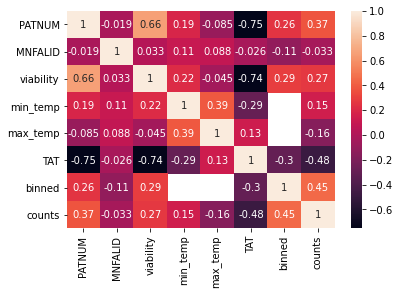

In [193]:
# plot the heatmap
sns.heatmap(corr, annot= True,
        xticklabels=corr.columns,
        yticklabels=corr.columns)

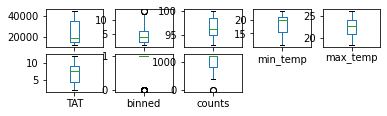

In [194]:
# box and whisker plots
df_num.plot(kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False)
pyplot.show()

counts    AxesSubplot(0.125,0.536818;0.352273x0.343182)
dtype: object

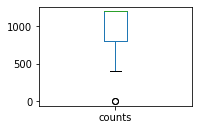

In [195]:
df_num['counts'].plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)


min_temp    AxesSubplot(0.125,0.536818;0.352273x0.343182)
dtype: object

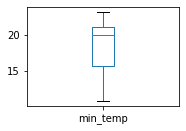

In [196]:
df_num['min_temp'].plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)


In [0]:
# # scatter plot matrix
# scatter_matrix(df_num)
# pyplot.show()

Text(0.5, 1.0, 'Correlation Heatmap')

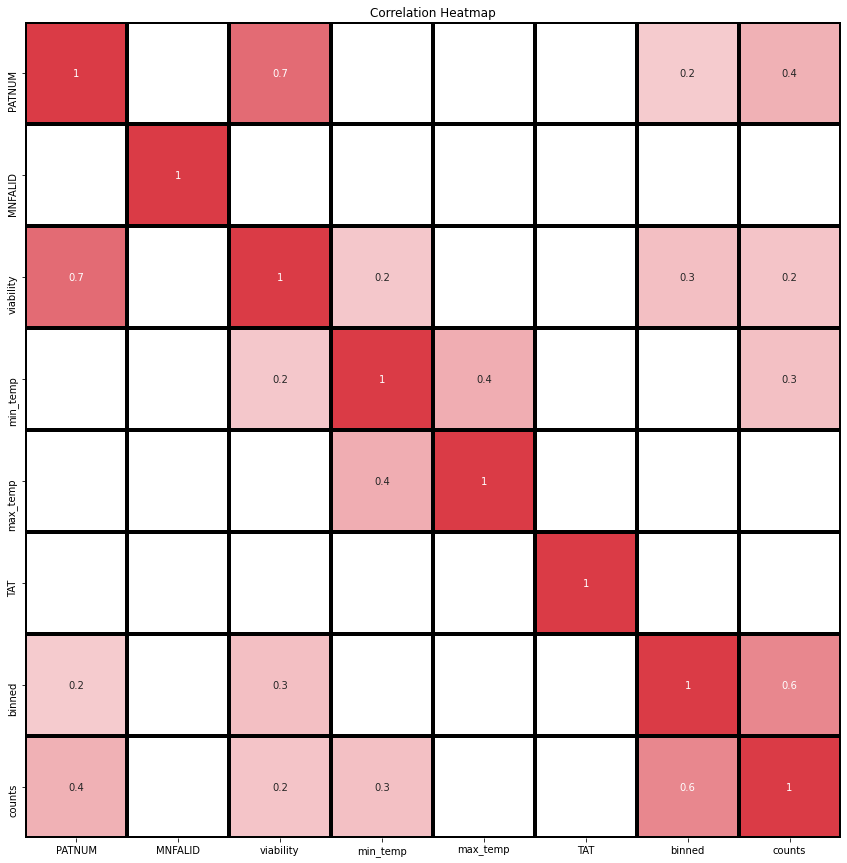

In [198]:
n_colors = 256 # Use 256 colors for the diverging color palette
palette = sns.diverging_palette(20, 220, n=n_colors) # Create the palette
color_min, color_max = [-1, 1] # Range of values that will be mapped to the palette, i.e. min and max possible correlation

def value_to_color(val):
    val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
    ind = int(val_position * (n_colors - 1)) # target index in the color palette
    return palette[ind]

    ax.scatter(
    x=x.map(x_to_num),
    y=y.map(y_to_num),
    s=size * size_scale,
    c=color.apply(value_to_color), # Vector of square color values, mapped to color palette
    marker='s'
)


pyplot.subplots(figsize=(20,15))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
fig = sns.heatmap(df_num.corr()[df_num.corr() >= 0.2], annot = True, fmt='.1g', vmin=-1, vmax=1, center= 0, 
cmap= colormap, linewidths=3, linecolor='black', cbar=False, square=True)
pyplot.title("Correlation Heatmap")

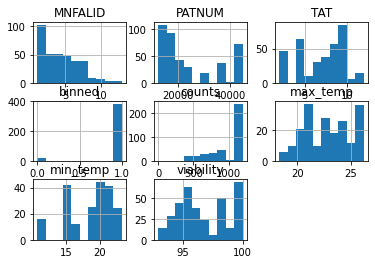

In [199]:
# histograms
df_num.hist()
pyplot.show()

Use the kernel density estimation to visualize a bivariate distribution. 

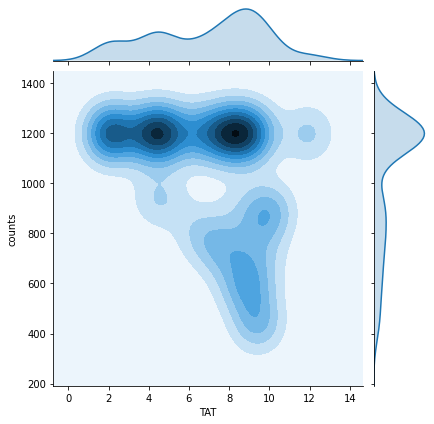

In [200]:
sns.jointplot(x="TAT", y="counts", data=df, kind="kde");
  

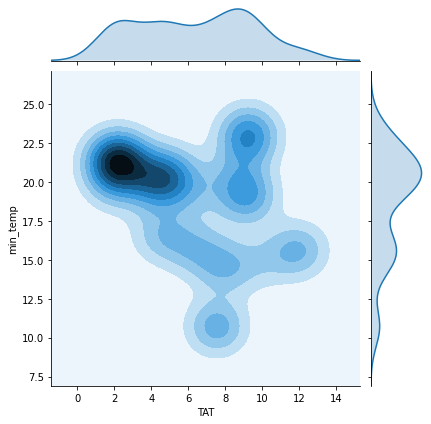

In [201]:
sns.jointplot(x="TAT", y="min_temp", data=df_num, kind="kde");


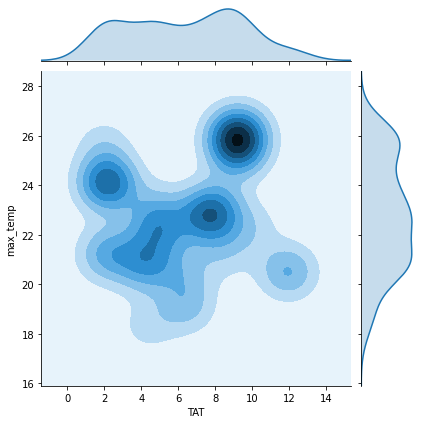

In [202]:
sns.jointplot(x="TAT", y="max_temp", data=df_num, kind="kde");


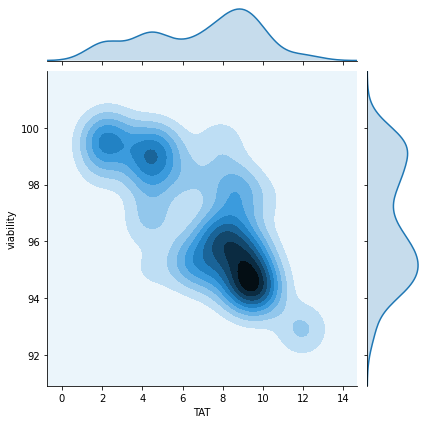

In [203]:
sns.jointplot(x="TAT", y="viability", data=df_num, kind="kde");


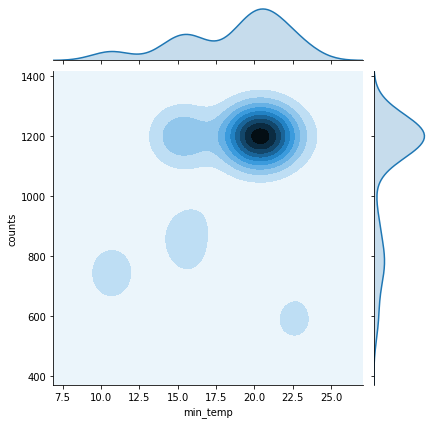

In [204]:
sns.jointplot(x="min_temp", y="counts", data=df_num, kind="kde");


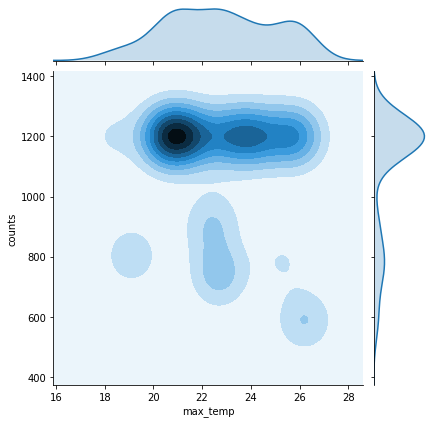

In [205]:
sns.jointplot(x="max_temp", y="counts", data=df_num, kind="kde");


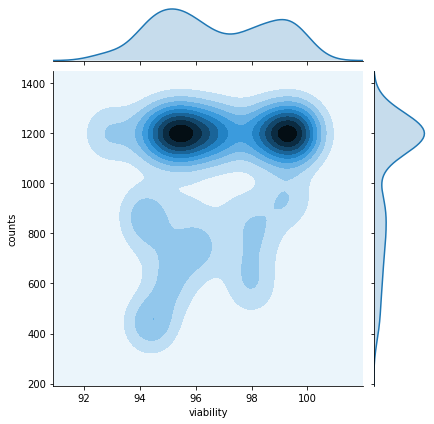

In [206]:
sns.jointplot(x="viability", y="counts", data=df_num, kind="kde");


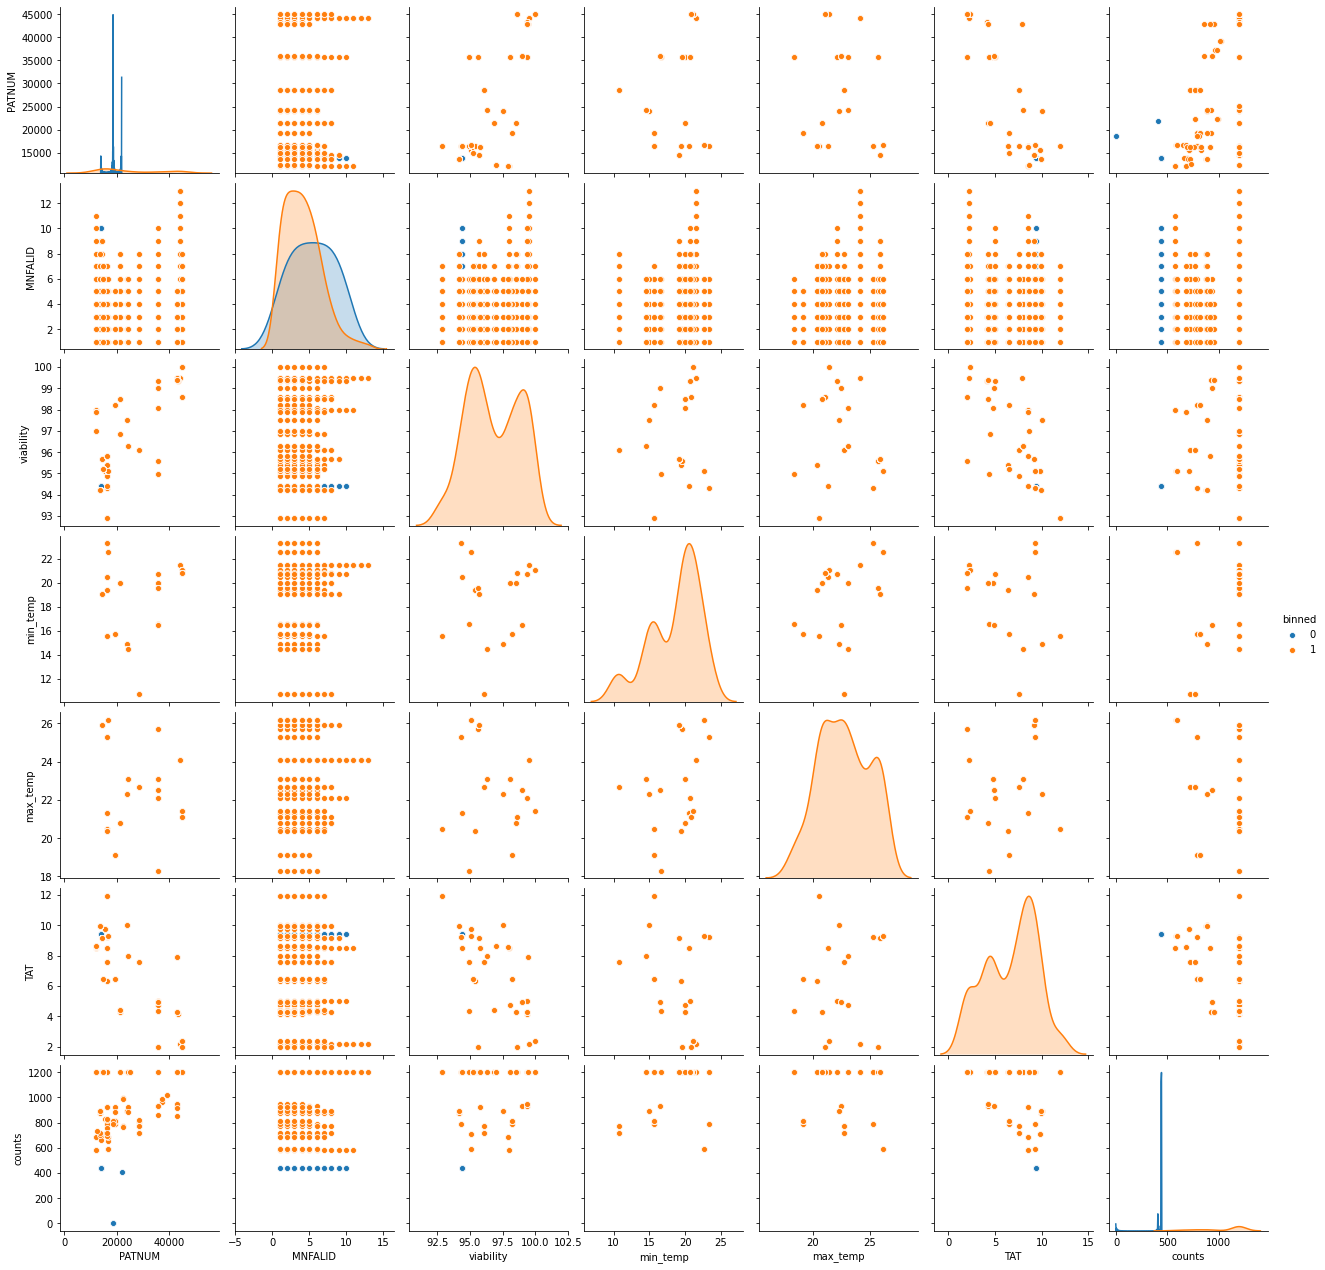

In [207]:
sns.pairplot(df_num, hue="binned");

In [0]:
# g = sns.PairGrid(df_num)
# g.map_diag(sns.kdeplot)
# g.map_offdiag(sns.kdeplot, n_levels=6);

# Regression plots

In [0]:
from statsmodels.compat import lzip
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.factorplots import interaction_plot

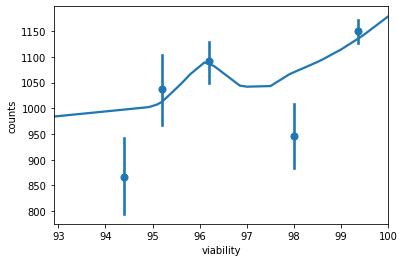

In [210]:
ax=sns.regplot(x="viability", y="counts", data=df_num, lowess=True, ci=95,x_bins=5)
pyplot.show()

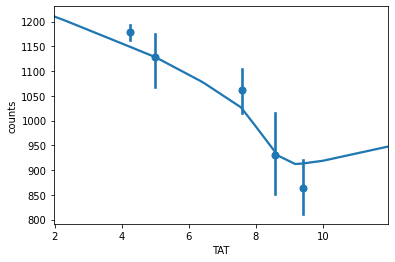

In [211]:
ax=sns.regplot(x="TAT", y="counts", data=df_num, lowess=True, ci=95,x_bins=5)
pyplot.show()

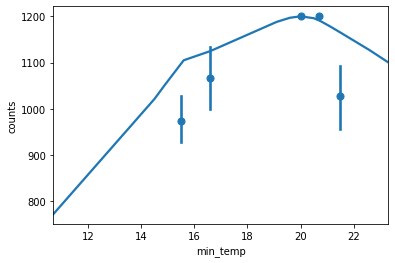

In [212]:
ax=sns.regplot(x="min_temp", y="counts", data=df_num, lowess=True, ci=95,x_bins=5)
pyplot.show()

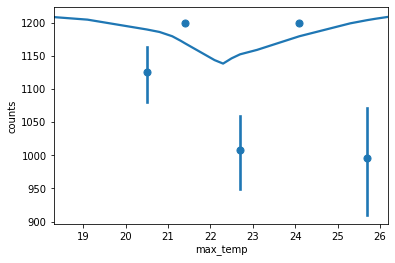

In [213]:
ax=sns.regplot(x="max_temp", y="counts", data=df_num, lowess=True, ci=95,x_bins=5)
pyplot.show()

# Drop columns: patient number, ALID, counts

In [0]:
# drop aliquot id and counts
df_num.drop(columns=['PATNUM', 'MNFALID', 'counts'], inplace=True)

In [215]:
df_num.shape

(404, 5)

In [216]:
df_num.binned.value_counts()

1    381
0     23
Name: binned, dtype: int64

# Inspect Missingness

In [217]:
df_num.isnull().mean() * 100

viability    13.366337
min_temp     49.504950
max_temp     49.504950
TAT          13.366337
binned        0.000000
dtype: float64

In [0]:
# From a Data Science perspective it is wrong to first replace NA and then split into train and test
# You MUST first split into train and test, then replace NA by mean on train,
#  and then apply this stateful preprocessing model to test,

# from sklearn.preprocessing import Imputer
# missingvalues = Imputer(missing_values = np.nan, strategy = 'mean', axis = 0)
# missingvalues = missingvalues.fit(x[:,1:3])
# x[:,1:3] = missingvalues.transform(x[:,1:3])

# Machine Learning

In [219]:
!pip install impyute

In [0]:
# SMOTE for imbalanced dataset
from collections import Counter
from imblearn.over_sampling import SVMSMOTE
from matplotlib import pyplot
from numpy import where

import seaborn as sns

# grid search k value for SMOTE oversampling and undersampling for imbalanced classification
from numpy import mean
from numpy import std
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [0]:
# imputation module

from impyute.imputation.cs import mice

In [222]:
# create df_num
df_num.shape

(404, 5)

In [0]:
X_df = df_num.iloc[:,0:4]

In [224]:
X_df.columns

Index(['viability', 'min_temp', 'max_temp', 'TAT'], dtype='object')

# Define X and Y

In [0]:
# define dataset
values = df_num.values
X = values[:,0:4]
y = values[:,4]

# Split train and test sets

(only impute after splitting, or else you touch the validation set, and there will be data leakage)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=123, shuffle=True)

# Imputation methods

on training data

In [233]:
# mice-imputed X
X_train = mice(X_train)

BadInputError: ignored

In [234]:
X_test = mice(X_test)

BadInputError: ignored

In [235]:
# check for missing values

np.isnan(np.min(X_train))

False

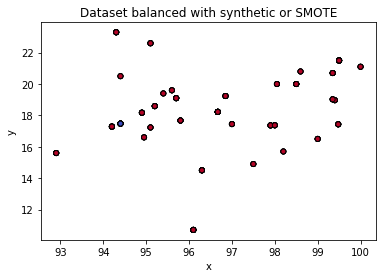

In [240]:
# transform the dataset

# for reproducibility
seed = 100
# SMOTE number of neighbors
k =1 

oversample = BorderlineSMOTE(k_neighbors= k, random_state=seed)
X_train, y_train = oversample.fit_resample(X_train, y_train)

plt.title('Dataset balanced with synthetic or SMOTE')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(X_res[:, 0], X_res[:, 1], marker='o', c=y_res,
           s=25, edgecolor='k', cmap=plt.cm.coolwarm)
plt.show()

In [241]:
Counter(y_res)

Counter({0.0: 17, 1.0: 286})

In [0]:
# transform the dataset

# for reproducibility
seed = 100
# SMOTE number of neighbors
k =1 

oversample = BorderlineSMOTE(k_neighbors= k, random_state=seed)
X_test, y_test = oversample.fit_resample(X_test, y_test)

# Scaling/Normalization/Standardization

Presumably, if you really need to center & scale the data, that should be done after imputation, as the imputation could influence on the correct center and scale to use!

Generally, the imputation should be the very first step in any analysis you do.

However, depending on the imputation method used, for example if we Impute using distance based measure (eg. KNN), then it is recommended to first standardize the data and then Impute. That is because lower magnitude values converge faster.

Use MinMax scaler unless you have a theoretical need for "stronger medicine."

Tip: Which Method To Use
It is hard to know whether rescaling your data will improve the performance of your algorithms before you apply them. If often can, but not always.

A good tip is to create rescaled copies of your dataset and race them against each other using your test harness and a handful of algorithms you want to spot check. This can quickly highlight the benefits (or lack there of) of rescaling your data with given models, and which rescaling method may be worthy of further investigation. - from Machine Learning Mastery. Accessed 4/9/2020 (https://machinelearningmastery.com/rescaling-data-for-machine-learning-in-python-with-scikit-learn/)

In [0]:
def sci_minmax(X):
    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1), copy=True)
    return minmax_scale.fit_transform(X)

In [0]:
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

In [0]:
X_train = sci_minmax(X_train)

In [0]:
X_test = sci_minmax(X_test)

In [0]:
# get a list of models to evaluate
def get_models():
	models = dict()
	models['lr'] = LogisticRegression()
	models['knn'] = KNeighborsClassifier()
	models['cart'] = DecisionTreeClassifier()
	models['svm'] = SVC()
	models['bayes'] = GaussianNB()
	return models

# Scaled and Imputed Data Has Been Created!

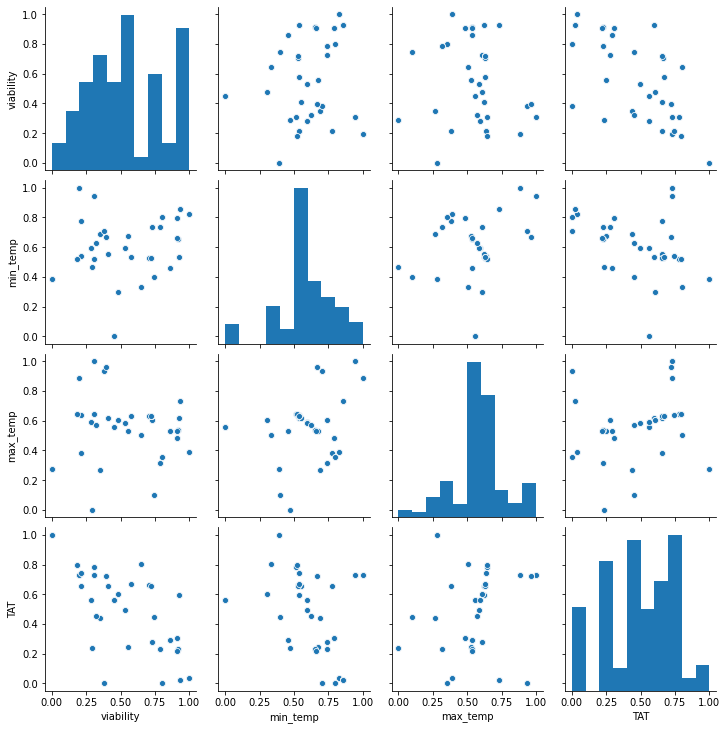

In [116]:
# pairplot of scaled and mice-imputed test data 

sns.pairplot(pd.DataFrame(X_train, columns=X_df.columns));

# Evaluate Models

In [0]:
# evaluate a given model using cross-validation
def evaluate_model(model):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)# transform the dataset
  scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
  return scores

>lr 0.944 (0.015)
>knn 0.993 (0.013)
>cart 0.993 (0.013)
>svm 0.944 (0.015)
>bayes 0.911 (0.059)


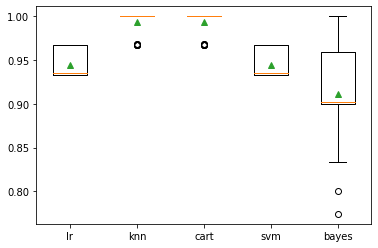

In [118]:
# get the models to evaluate
models = get_models()


# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():

  scores = evaluate_model(model)
  results.append(scores)
  names.append(name)
  print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [119]:
from sklearn.ensemble import StackingClassifier
from imblearn.over_sampling import BorderlineSMOTE


# define the base models
level0 = list()
level0.append(('lr', LogisticRegression()))
level0.append(('knn', KNeighborsClassifier()))
level0.append(('cart', DecisionTreeClassifier()))
level0.append(('svm', SVC()))
level0.append(('bayes', GaussianNB()))
# define meta learner model
level1 = LogisticRegression()
# define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
# fit the model on all available data
# transform the dataset
oversample = BorderlineSMOTE()
X, y = oversample.fit_resample(X_train, y_train)
model.fit(X, y)


StackingClassifier(cv=5,
                   estimators=[('lr',
                                LogisticRegression(C=1.0, class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=None, max_iter=100,
                                                   multi_class='auto',
                                                   n_jobs=None, penalty='l2',
                                                   random_state=None,
                                                   solver='lbfgs', tol=0.0001,
                                                   verbose=0,
                                                   warm_start=False)),
                               ('knn',
                                KNeighborsClassifier(algorithm='auto',
                                 

In [120]:
print(model)

StackingClassifier(cv=5,
                   estimators=[('lr',
                                LogisticRegression(C=1.0, class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=None, max_iter=100,
                                                   multi_class='auto',
                                                   n_jobs=None, penalty='l2',
                                                   random_state=None,
                                                   solver='lbfgs', tol=0.0001,
                                                   verbose=0,
                                                   warm_start=False)),
                               ('knn',
                                KNeighborsClassifier(algorithm='auto',
                                 

In [121]:
data = [[90, 10,35, 24]]
yhat = model.predict(data)
print('Predicted Class: %d' % (yhat))

Predicted Class: 1
